# Name : Pawan
# DSBI Intern @ The Spark Foundation
## Task 3
### Problem Description:
- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
- As a business manager, try to find out the weak areas where you can
work to make more profit.
- What all business problems you can derive by exploring the data?

practitioner can get the dataset from this link [Dataset link](https://bit.ly/2TK5Xn5)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("SampleSuperstore.csv")


In [3]:
dataset.head(15)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
dataset.isnull().sum()     # <- checking for null values 

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### check duplicate entries and remove them.

In [5]:
dataset.duplicated().sum()          # checking for duplicate entries/rows in dataset.

17

In [6]:
dataset.drop_duplicates(keep='first',inplace=True)   # <- removing duplicate entries.
dataset.duplicated().sum()                           # <- again checking duplicate rows 

0

## Now see the correlation between different columns.

In [7]:
import seaborn as sns


<AxesSubplot:>

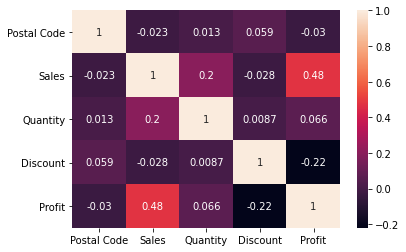

In [8]:
sns.heatmap(dataset.corr(),annot=True)

## Now Let's see sales and profit in each Category

In [9]:
sales_and_profit = pd.DataFrame({"sales": dataset.groupby('Category')['Sales'].sum(),"profits": dataset.groupby('Category')['Profit'].sum()})

In [10]:
sales_and_profit

,sales,profits
Category,,
Furniture,741306.3133,18421.8137
Office Supplies,718735.2440,122364.6608
Technology,836154.0330,145454.9481


<AxesSubplot:xlabel='Category'>

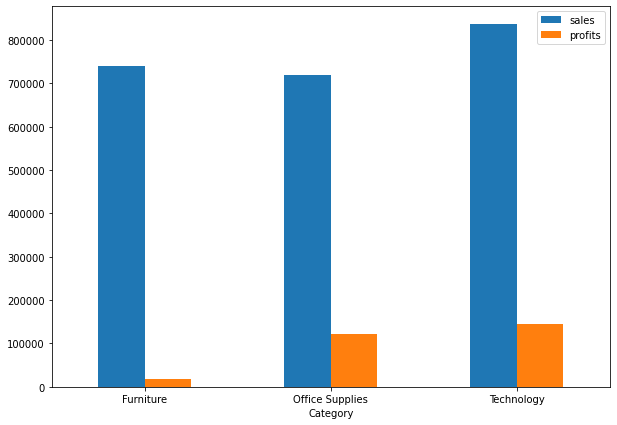

In [11]:
sales_and_profit.plot(kind='bar',rot=0,figsize=(10,7))

### Result : Maximum sales is done in Technology category
- Furniture has minimum margin/profit while Technology provide Maximum margin/profit. 

## Now Let's check Region wise sales of different categories.

In [12]:
Reg_Sal_Pro = pd.DataFrame({"sales": dataset.groupby(["Region",'Category'])['Sales'].sum(),"profit":dataset.groupby(["Region",'Category'])['Profit'].sum()})

In [13]:
Reg_Sal_Pro

sales      profit
Region  Category                                
Central Furniture        163407.1938  -2906.1467
        Office Supplies  166959.3470   8864.5899
        Technology       170416.3120  33697.4320
East    Furniture        208009.8320   3058.2246
        Office Supplies  205451.3830  40986.0495
        Technology       264973.9810  47462.0351
South   Furniture        117298.6840   6771.2061
        Office Supplies  125651.3130  19986.3928
        Technology       148771.9080  19991.8314
West    Furniture        252590.6035  11498.5297
        Office Supplies  220673.2010  52527.6286
        Technology       251991.8320  44303.6496

<AxesSubplot:ylabel='Region,Category'>

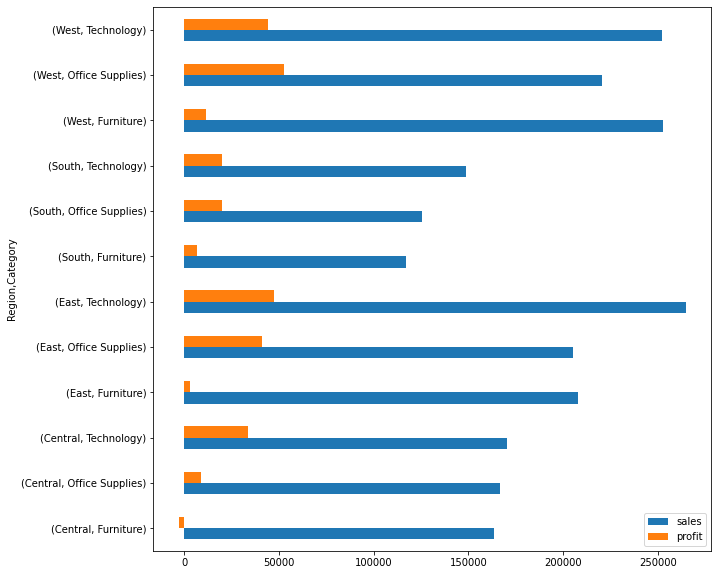

In [47]:
Reg_Sal_Pro.plot.barh(figsize=(10,10))

## Result
- As we can see from the bar graph that in Central United states "Furniture category" is performing worst even after making good sales.
- Central and East united states are the places where "Furniture category is not making good profit".
- "Technology category" is performing good in each region. Specially in West and East region of united states.
- "Office Supplies category" is also pereforming good. Specially in East and West region.

## Now we will find the reason behind the low performance of "furniture category" in "central region" of US.

In [38]:
a = dataset.groupby(['Region','Ship Mode',"Category"])['Profit'].sum().sort_values()

<AxesSubplot:ylabel='Region,Ship Mode,Category'>

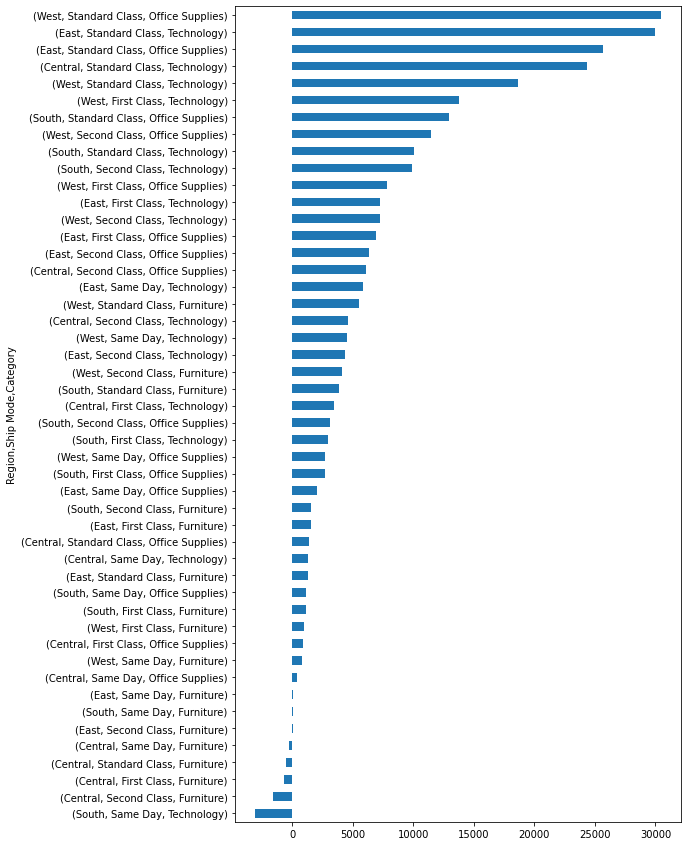

In [39]:
a.plot.barh(rot=0,figsize=(8,15))

In [42]:
dataset.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

### Result: As we are able to see from the above graph that all the ship Mode is causing loss(negative profit) to superstore.
### Reasons:
- From the "Map of urban-rural in US" and "region in US" image we find out that Central Region of US is not an Metropolitian area. In Rural areas suitable mode of transports are very few. Because of this shipping Furniture product to rural region can be much costly than in urban areas.

## Region in US 
> <img src="region in US.png" width='600px' height='400px' >

## Map of urban-rural of US
> <img src="Map of urban-rural of US.jpg" width='600px' height='400px'> 

### Solutions:
- We can open local Superstore in these areas to save on shipping Mode Cost.
- Minimise the Discount rate also. because we are already short on profit in this area.


# Now we will see mostly used Ship mode

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

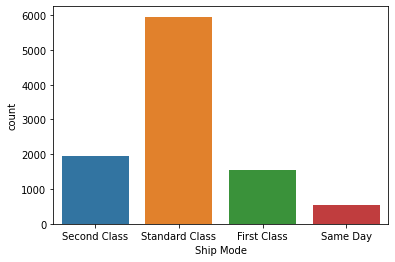

In [49]:
sns.countplot(x=dataset['Ship Mode'])

# Now we will see which segment makes more purchase.

<AxesSubplot:xlabel='Segment', ylabel='count'>

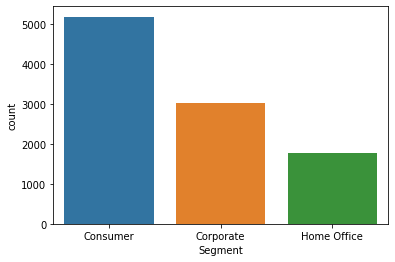

In [52]:
sns.countplot(x = dataset['Segment'])

# Top 10 Cities who contibutes more in sales

<AxesSubplot:xlabel='City'>

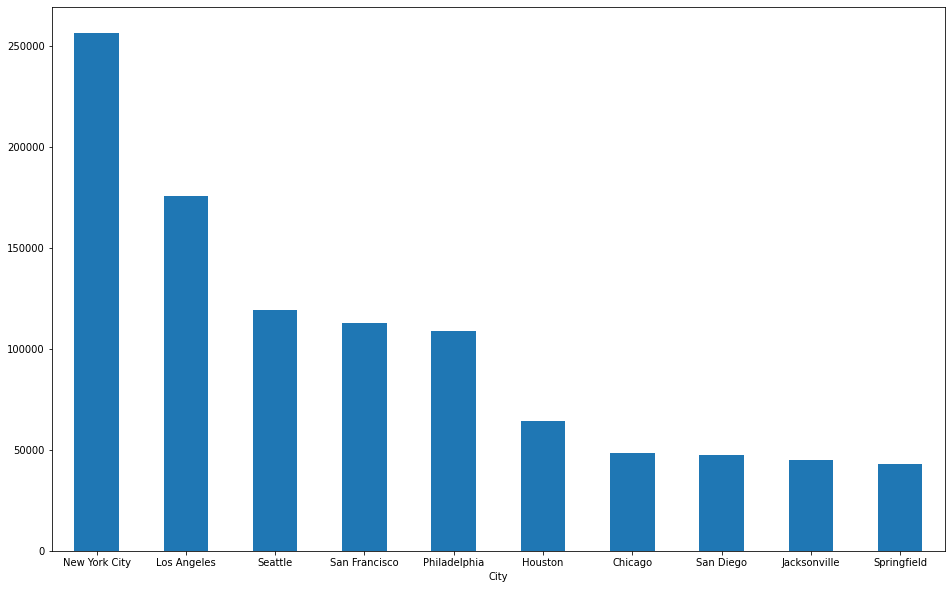

In [69]:
dataset.groupby(['City'])['Sales'].sum().sort_values(ascending = False).head(10).plot(kind='bar',figsize=(16,10),rot=0)

# Contribution of each Sub category in Sales.

In [74]:
dataset['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

<AxesSubplot:ylabel='Sub-Category'>

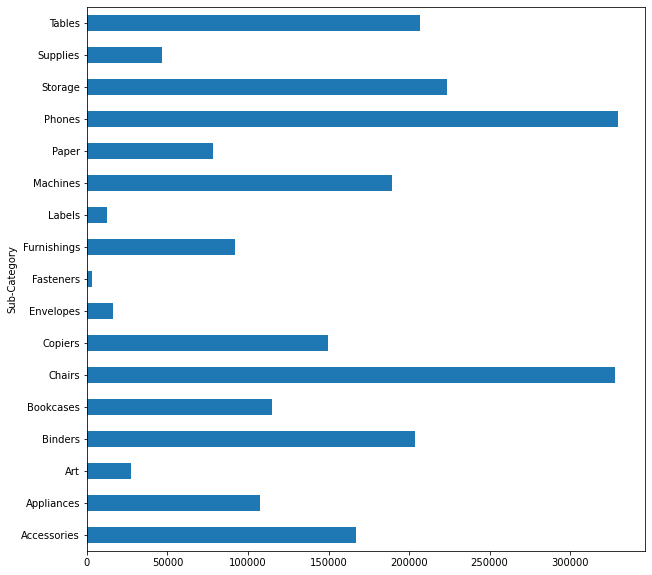

In [76]:
dataset.groupby(['Sub-Category'])['Sales'].sum().plot(kind='barh',figsize=(10,10),rot=0)

In [ ]:
### In the above graph we can see that "sub-category" like (Fasteners,Labels and Envelopes) are not contributing enough in sales.

### Solutions:
- We can provide extra discounts on them.
- Try to sell the products of these sub-categories using offers like (Buy 2 get 1 free etc.)
- Using Association rule find the combos for these sub-category products which are more likely to buy.

# ConClusion
## Task 2 Completed
- [x] Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
- [x] As a business manager, try to find out the weak areas where you can work to make more profit.
- [x] What all business problems you can derive by exploring the data?

# Thank You